<a href="https://colab.research.google.com/github/bhavi289/DL-GANs/blob/master/DL_Assign2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as Adam
from google.colab import drive
import PIL
import glob 
import imageio 
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
import os 
import PIL 
import tensorflow.keras.layers as layers 
import tensorflow.keras.models as models 

import time
from IPython import display

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset_path = 'drive/My Drive/Semester 6/DL/Assignment 2/faces94/'
flag = 0
X = []
i = 0
for root, directories, files in os.walk(dataset_path):
  for file in files:
    try:
        file_path = root + '/' + file
        extension_list = ['jpg', 'jpeg', 'png', 'svg']
        i += 1
        if (file_path.split('.')[-1] in extension_list):
          
          img = PIL.Image.open( file_path )
          img = img.resize((128, 128))
          img.load()
          image = np.asarray( img, dtype="int32" )
          
          if flag == 0:
            flag = 1
            X = np.array([image])
          else:
            X = np.append(X, [image], axis=0)
    except Exception as e:
        print (e)   
        pass

print ("No. of images = {}".format(len(X)))

No. of images = 3126


In [0]:

def load_image( infilename ) :
    img = PIL.Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

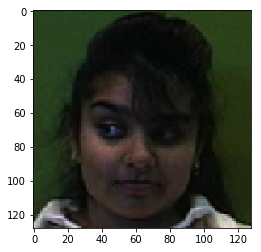

In [0]:

plt.imshow((X[3000]), interpolation='nearest')
plt.show()

In [0]:
 X.shape

In [0]:
from sklearn import preprocessing
X_train = X/255

In [0]:
X_train.shape

In [0]:
input_img = layers.Input(shape=(128, 128, 3))

x = layers.Conv2D(8, (5, 5), strides=2, padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(16, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(32, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(100, (4, 4), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
encoded = layers.Activation('relu')(x)

x = layers.Conv2DTranspose(64, (4, 4), padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2DTranspose(32, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2DTranspose(16, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2DTranspose(3, (8, 8), strides=2,padding='same')(x)
decoded = layers.BatchNormalization()(x)

In [0]:
model = models.Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
print("X shape = {}".format(X.shape))

X shape = (3126, 128, 128, 3)


In [0]:
# X_train.shape
print("X shape = {}".format(X_train.shape))

X shape = (3126, 128, 128, 3)


In [0]:
model.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
3126/3126 [==============================] - 8s 2ms/sample - loss: 0.7634
Epoch 2/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.5016
Epoch 3/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.3638
Epoch 4/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.1600
Epoch 5/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.0182
Epoch 6/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.0128
Epoch 7/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.0107
Epoch 8/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.0097
Epoch 9/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.0090
Epoch 10/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.0085
Epoch 11/50
3126/3126 [==============================] - 5s 2ms/sample - loss: 0.0082
Epoch 12/50
3126/3126 [==============================] - 5s 2ms

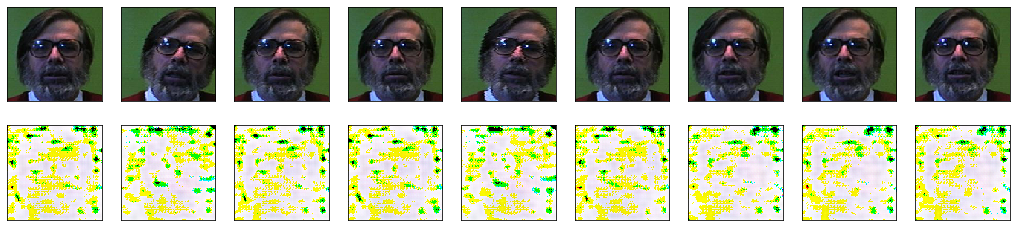

In [0]:
decoded_imgs = model.predict(X)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow((decoded_imgs[i]).reshape(128, 128, 3).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# print (decoded_imgs[0])

In [0]:
x_train = X.reshape((len(X), np.prod(X.shape[1:])))

In [0]:
print("x_train shape = {}".format(x_train.shape))

x_train shape = (3126, 49152)


In [0]:
print("X shape = {}".format(X.shape))
# X.shape

X shape = (3126, 128, 128, 3)


In [0]:
X_Train = X.astype('float32') / 255

print(X_Train.shape)
X_Train = np.reshape(X_Train, (len(X_Train), 28, 28, 3))
print(X_Train.shape)
print(X[0])
print("***")
print(X_Train[0])



In [0]:

input_img = layers.Input(shape=(28, 28, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [0]:
autoencoder.fit(X, X,
                epochs=50,
                batch_size=128,
                shuffle=True,
                )

In [0]:
decoded_imgs = autoencoder.predict(X)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    ax = plt.subplot(2, n, i)
    plt.imshow(X_Train[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28, 3).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
print ((decoded_imgs[0]).astype(np.uint8))
print (X_Train[0]*255)

In [0]:
input_img= layers.Input(shape=(49152,))

encoded = layers.Dense(units=128, activation='relu')(input_img)
encoded = layers.Dense(units=64, activation='relu')(encoded)
encoded = layers.Dense(units=32, activation='relu')(encoded)

decoded = layers.Dense(units=64, activation='relu')(encoded)
decoded = layers,Dense(units=128, activation='relu')(decoded)
autoencoder = models.Model(input_img, decoded)
encoder = models.Model(input_img, encoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train_noisy, X_train_noisy, epochs=100, batch_size=256, shuffle=True)
encoded_imgs = encoder.predict(X_test_noisy)
predicted = autoencoder.predict(X_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [0]:
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)
autoencoder = tf.keras.Sequential()
autoencoder.add(layers.Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(layers.Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

In [0]:
input_img = layers.Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = models.Model(input_img, encoder_layer(input_img))

encoder.summary()

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, )

In [0]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_train.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_train)
decoded_imgs = autoencoder.predict(x_train)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_train[image_idx].reshape(200, 180, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(200, 180, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
autoencoder = tf.keras.Sequential()

autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=X.shape[1:]))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(layers.Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

autoencoder.add(layers.Flatten())
autoencoder.add(layers.Reshape((4, 4, 8)))

autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

In [0]:
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_3').output)
encoder.summary()

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X, X, epochs=100, batch_size=128)

In [0]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X.shape[0], size=num_images)

encoded_imgs = encoder.predict(X)
decoded_imgs = autoencoder.predict(X)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()[-1]

In [0]:
def load_image( infilename ) :
    img = PIL.Image.open( infilename )
    img = img.resize((64,64))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [0]:
X_backup = X
print (len(X_backup))
plt.imshow(load_image(X[3000]), interpolation='nearest')
plt.show()